In [3]:
# ==========================================
# Árvore de Decisão
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Biscobis.csv')
df.head()

,ident,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
1,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
2,7,4.6,2.4,9.5,6.6,3.5,4.5,7.6,0,46,5.8,1,0,1,1
3,9,5.5,1.6,9.4,4.7,3.5,3.0,7.6,0,63,5.4,1,0,1,3
4,11,2.4,1.6,8.8,4.8,2.0,2.8,5.8,0,32,4.3,1,0,0,1


In [5]:
# ==========================================
# 2. Separação em treino e teste
# ==========================================
X = df[["x1","x2","x3","x4","x5","x6","x7"]]
y = df["x11"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [6]:
# ==========================================
# 3. Construção do Modelo com entropia
# ==========================================
modelo = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,          # controla a profundidade da árvore
    min_samples_split=10, # mínimo de amostras para split
    random_state=42
)

modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       random_state=42)


Acurácia: 0.9333333333333333

Matriz de Confusão:
 [[11  1]
 [ 1 17]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.94      0.94      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



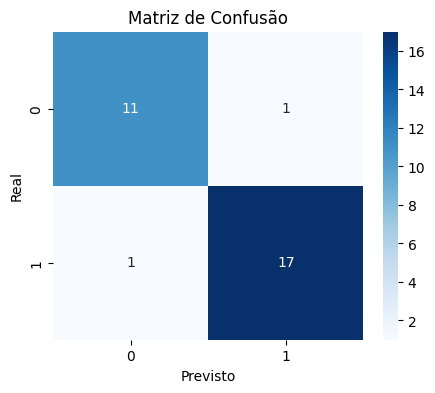

In [7]:
# ==========================================
# 4. Avaliação
# ==========================================
y_pred = modelo.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão em heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

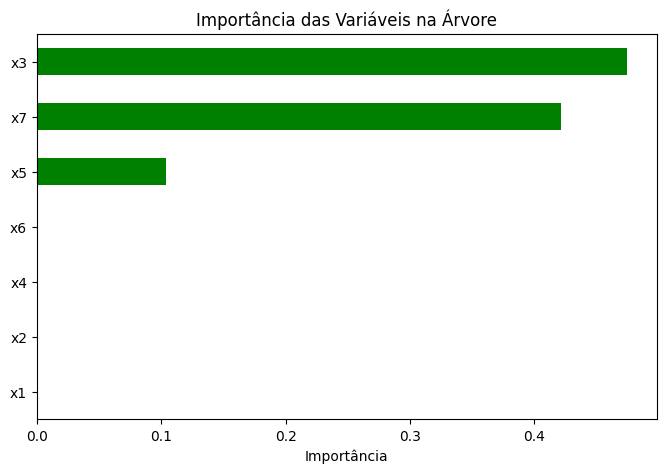


Importância das Variáveis:
x3    0.474740
x7    0.421033
x5    0.104227
x4    0.000000
x2    0.000000
x1    0.000000
x6    0.000000
dtype: float64


In [8]:
# ==========================================
# 5. Importância das Variáveis
# ==========================================
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="green")
plt.title("Importância das Variáveis na Árvore")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))


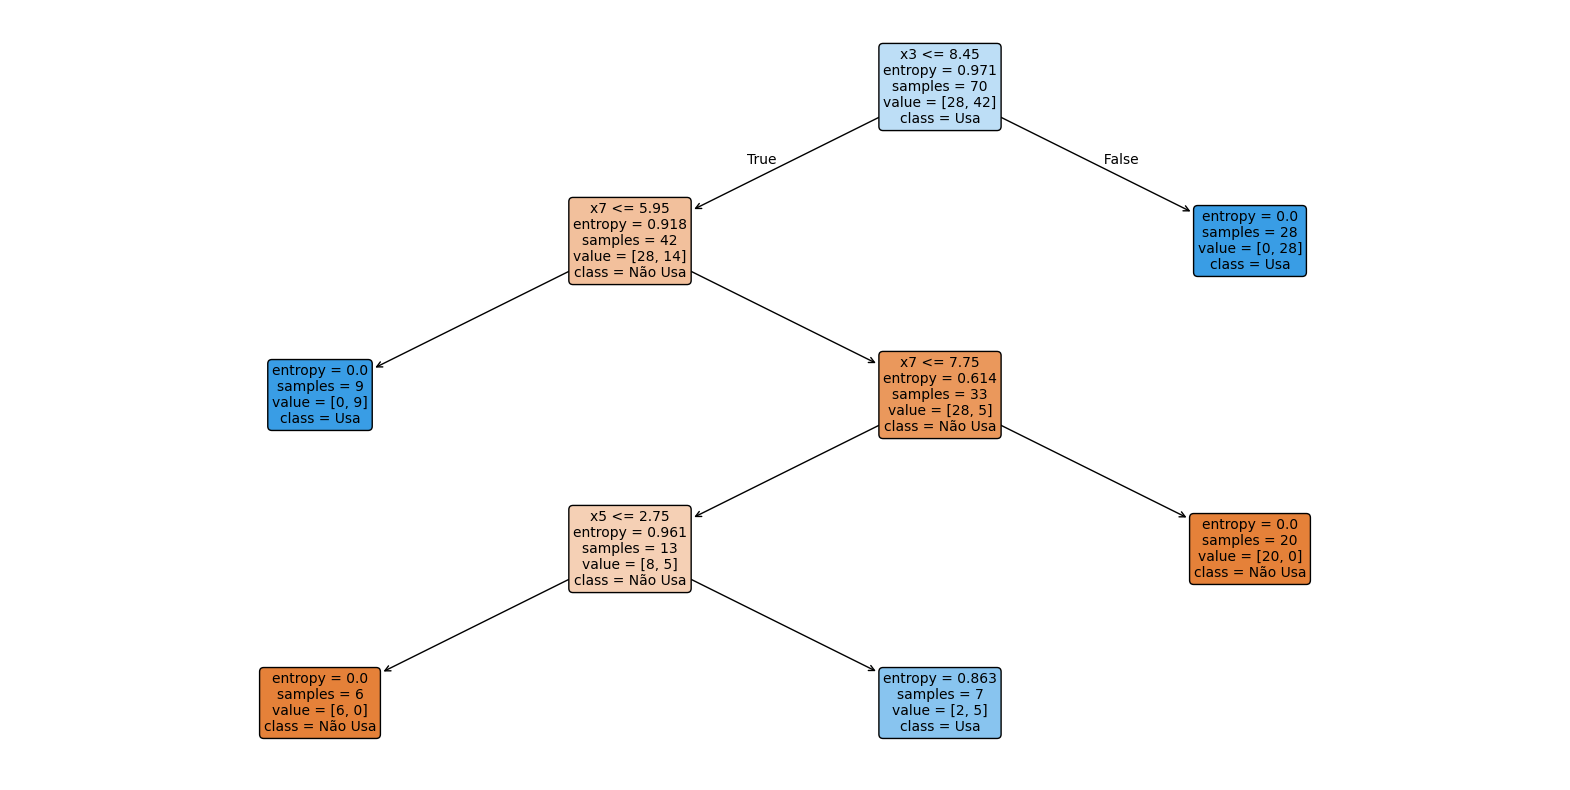

In [9]:

# ==========================================
# 6. Visualização da Árvore
# ==========================================
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=["Não Usa", "Usa"],
          filled=True, rounded=True, fontsize=10)
plt.show()

In [10]:
# ==========================================
# 3b. Construção do Modelo com gini
# ==========================================
modelo = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,          # controla a profundidade da árvore
    min_samples_split=10, # mínimo de amostras para split
    random_state=42
)

modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)


Acurácia: 0.9

Matriz de Confusão:
 [[10  2]
 [ 1 17]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



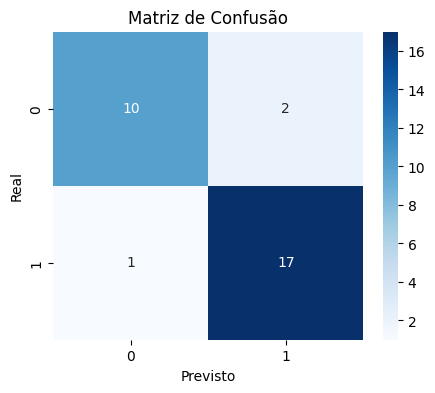

In [11]:
# ==========================================
# 4b. Avaliação
# ==========================================
y_pred = modelo.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão em heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

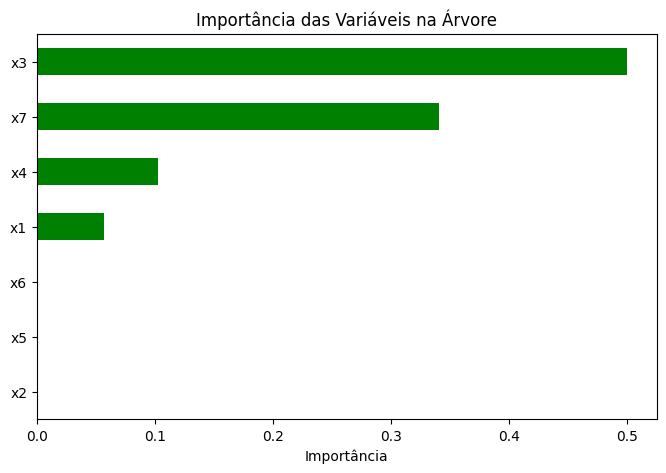


Importância das Variáveis:
x3    0.500000
x7    0.340909
x4    0.102639
x1    0.056452
x6    0.000000
x2    0.000000
x5    0.000000
dtype: float64


In [12]:
# ==========================================
# 5b. Importância das Variáveis
# ==========================================
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importancias.plot(kind="barh", color="green")
plt.title("Importância das Variáveis na Árvore")
plt.xlabel("Importância")
plt.show()

print("\nImportância das Variáveis:")
print(importancias.sort_values(ascending=False))


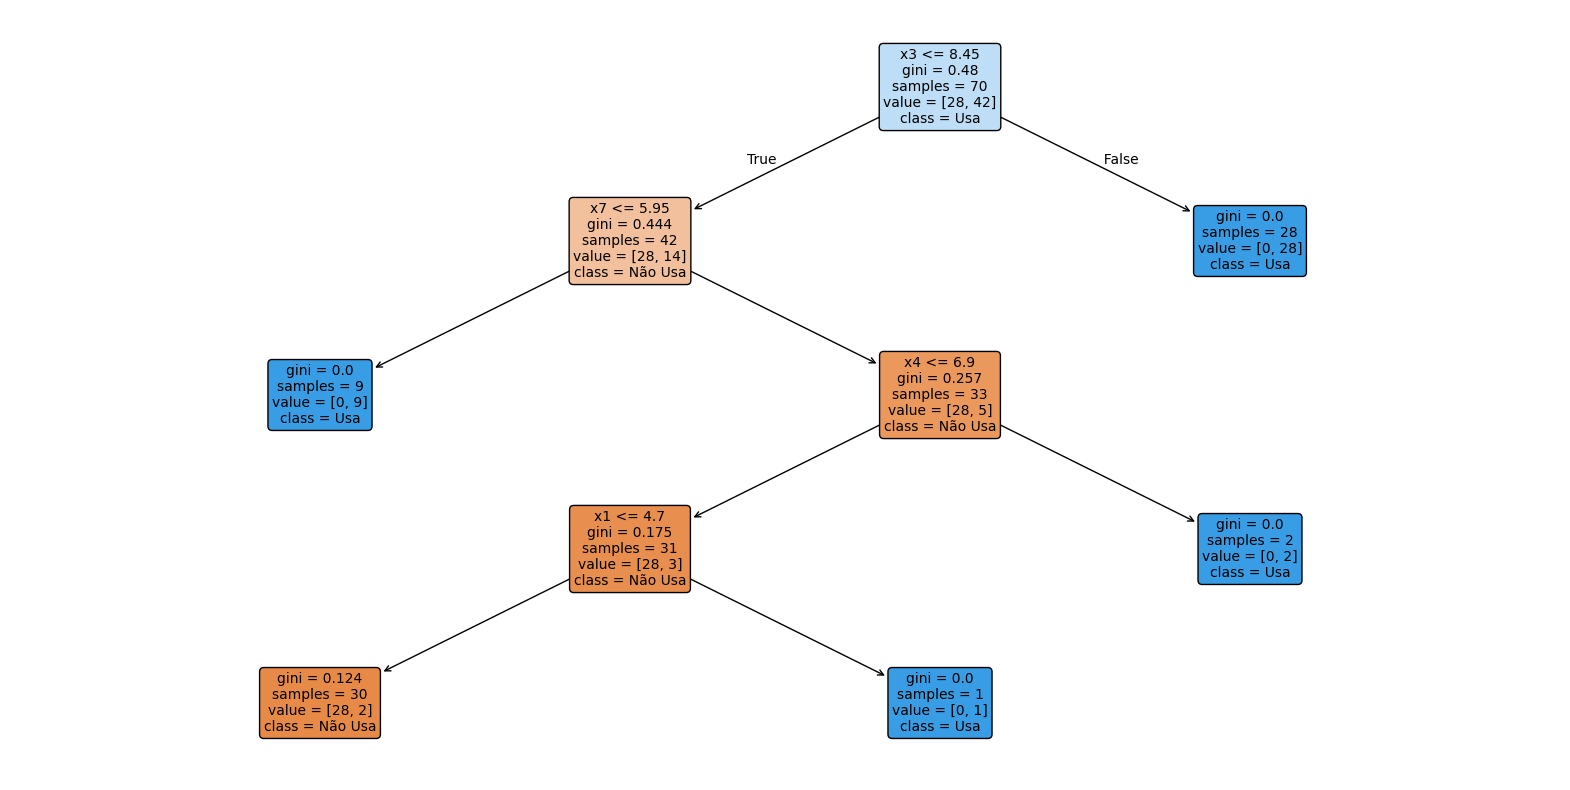

In [13]:

# ==========================================
# 6b. Visualização da Árvore
# ==========================================
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=["Não Usa", "Usa"],
          filled=True, rounded=True, fontsize=10)
plt.show()